In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardekho_data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df.drop_duplicates(inplace=True)

# Visualizacion de datos.

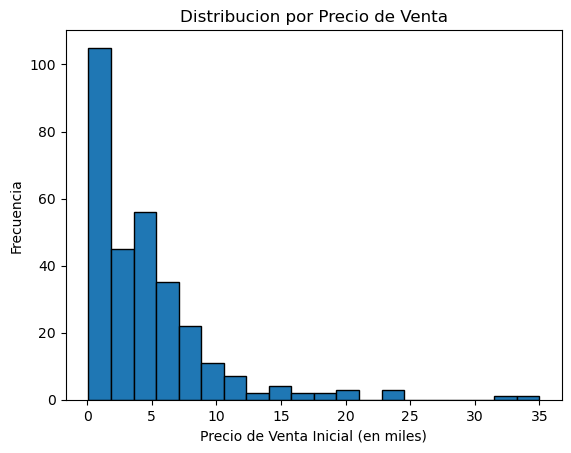

In [10]:
df['Selling_Price'].plot(kind='hist', bins = 20, title= 'Distribucion por Precio de Venta', edgecolor ='black')
plt.xlabel('Precio de Venta Inicial (en miles)')
plt.ylabel('Frecuencia')
plt.show()

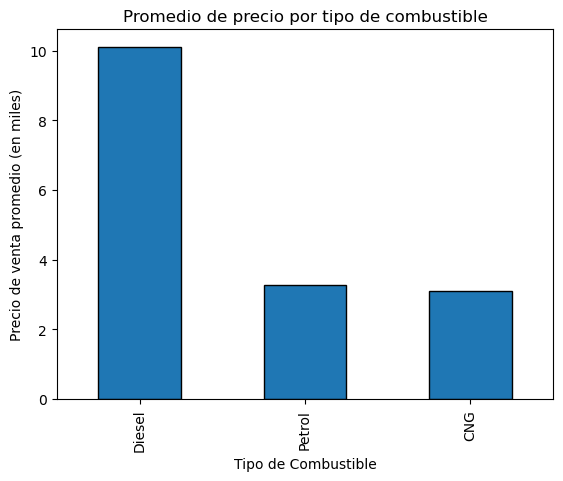

In [11]:
precio_por_combustible_avg = df.groupby('Fuel_Type')['Selling_Price'].mean()
precio_por_combustible_avg.sort_values(ascending=False).plot(kind='bar', title='Promedio de precio por tipo de combustible', edgecolor = 'black')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de venta promedio (en miles)')
plt.show()

In [12]:
transmission_counts = df['Transmission'].value_counts()
transmission_counts

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

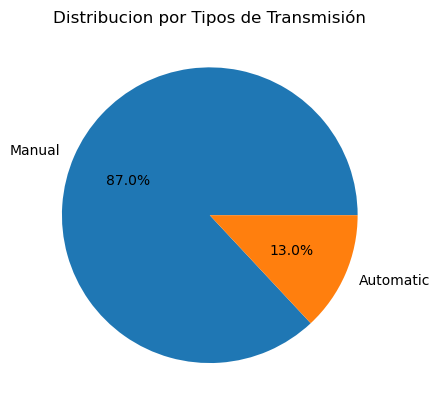

In [13]:
transmission_counts.plot(kind='pie', autopct= '%1.1f%%', title='Distribucion por Tipos de Transmisión')
plt.ylabel('')
plt.show()

In [14]:
seller_type_total_present_price = df.groupby('Seller_Type')['Present_Price'].sum()

In [15]:
seller_type_total_present_price

Seller_Type
Dealer        2081.43
Individual     173.34
Name: Present_Price, dtype: float64

In [16]:
yearly_avg_kms_driven = df.groupby('Year')['Kms_Driven'].mean()

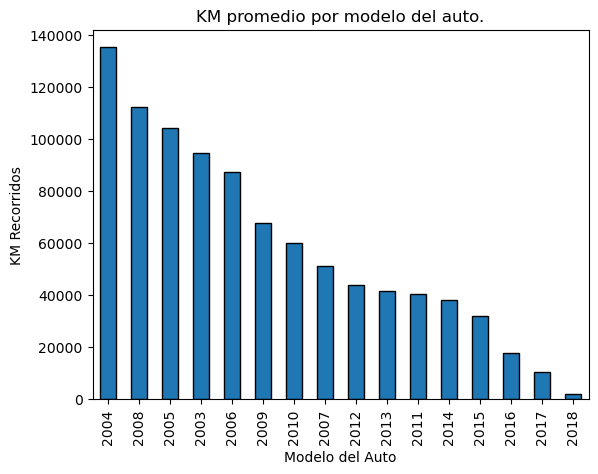

In [17]:
yearly_avg_kms_driven.sort_values(ascending=False).plot(kind='bar', title= 'KM promedio por modelo del auto.', edgecolor = 'black')
plt.xlabel('Modelo del Auto')
plt.ylabel('KM Recorridos')
plt.show()

In [18]:
fuel_trans_max_selling_price = df.groupby(['Fuel_Type', 'Transmission'])['Selling_Price'].max()

In [19]:
fuel_trans_max_selling_price.reset_index()

,Fuel_Type,Transmission,Selling_Price
0,CNG,Manual,3.25
1,Diesel,Automatic,33.00
2,Diesel,Manual,35.00
3,Petrol,Automatic,19.75
4,Petrol,Manual,17.00


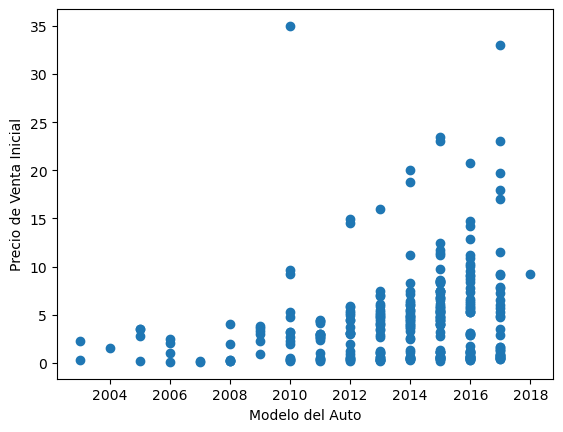

In [20]:
plt.scatter(df['Year'],df['Selling_Price'])
plt.xlabel('Modelo del Auto')
plt.ylabel('Precio de Venta Inicial')
plt.show()

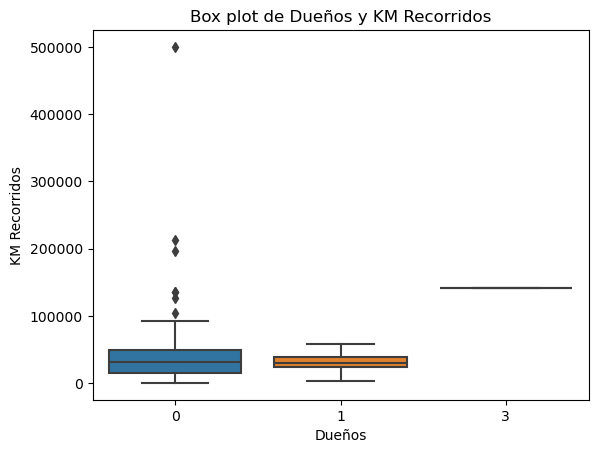

In [21]:
sns.boxplot(x='Owner', y= 'Kms_Driven', data=df)
plt.title('Box plot de Dueños y KM Recorridos')
plt.xlabel('Dueños')
plt.ylabel('KM Recorridos')
plt.show()

Text(0, 0.5, 'Precio Actual Promedio')

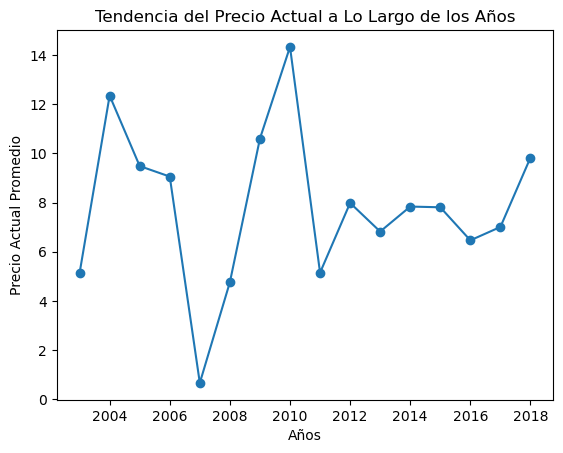

In [22]:
plt.plot(df.groupby('Year')['Present_Price'].mean(), marker = 'o')
plt.title('Tendencia del Precio Actual a Lo Largo de los Años')
plt.xlabel('Años')
plt.ylabel('Precio Actual Promedio')

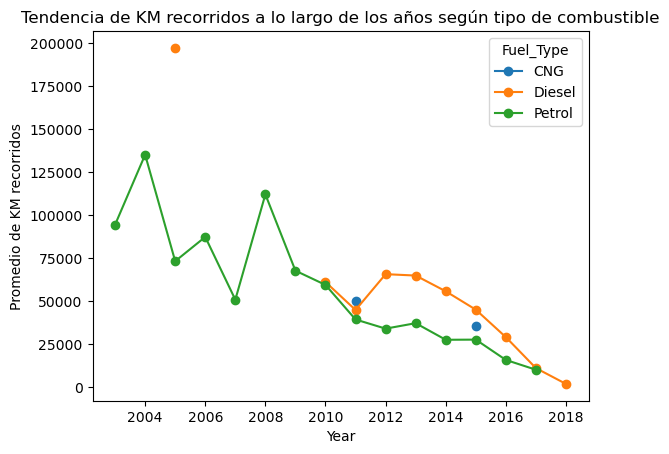

In [23]:
df.groupby(['Year','Fuel_Type'])['Kms_Driven'].mean().unstack().plot(kind='line', marker = 'o')
plt.title('Tendencia de KM recorridos a lo largo de los años según tipo de combustible')
plt.xlabel('Year')
plt.ylabel('Promedio de KM recorridos')
plt.show()

# Feature Engineering

In [24]:
y = df['Selling_Price']

In [25]:
X = df[['Year', 'Kms_Driven', 'Fuel_Type', 'Transmission', 'Owner']]

In [26]:
X

,Year,Kms_Driven,Fuel_Type,Transmission,Owner
0,2014,27000,Petrol,Manual,0
1,2013,43000,Diesel,Manual,0
2,2017,6900,Petrol,Manual,0
3,2011,5200,Petrol,Manual,0
4,2014,42450,Diesel,Manual,0
...,...,...,...,...,...
296,2016,33988,Diesel,Manual,0
297,2015,60000,Petrol,Manual,0
298,2009,87934,Petrol,Manual,0
299,2017,9000,Diesel,Manual,0


In [27]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [28]:
X['Fuel_Type'] = labelencoder.fit_transform(X['Fuel_Type'])
X['Transmission'] = labelencoder.fit_transform(X['Transmission'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_12184\3921149183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fuel_Type'] = labelencoder.fit_transform(X['Fuel_Type'])
C:\Users\pauli\AppData\Local\Temp\ipykernel_12184\3921149183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Transmission'] = labelencoder.fit_transform(X['Transmission'])


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [32]:
def modelresults(predictions):
    print('Mean Absolute Error Is {}'.format(mean_absolute_error(y_test, predictions)))
    print('Mean Squared Error Is {}'.format(np.sqrt(mean_absolute_error(y_test, predictions))))

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [37]:
preds_lr = lr.predict(scaled_X_test)

In [38]:
modelresults(preds_lr)

Mean Absolute Error Is 2.9535504018788425
Mean Squared Error Is 1.7185896548853197


In [39]:
from sklearn.svm import SVR

In [40]:
from sklearn.model_selection import GridSearchCV

In [42]:
svrmodel = SVR()
param_gridsvr = {'C': [0.1,0.5], "kernel": ['linear', 'rbf','poly'], "degree": [2,3,4] }

In [43]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [44]:
gridsvr.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [45]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'poly'}

In [47]:
preds_svr = gridsvr.predict(scaled_X_test)
modelresults(preds_svr)

Mean Absolute Error Is 3.0865815643756416
Mean Squared Error Is 1.756866974012444


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rfrmodel = RandomForestRegressor()

In [50]:
param_rfr = {'max_depth': [5,10], 'n_estimators': [2,5,8]}
gridrfr = GridSearchCV(rfrmodel, param_rfr)

In [51]:
gridrfr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [2, 5, 8]})

In [52]:
preds_rfr= gridrfr.predict(scaled_X_test)
modelresults(preds_rfr)

Mean Absolute Error Is 2.608427226378961
Mean Squared Error Is 1.615062607572524


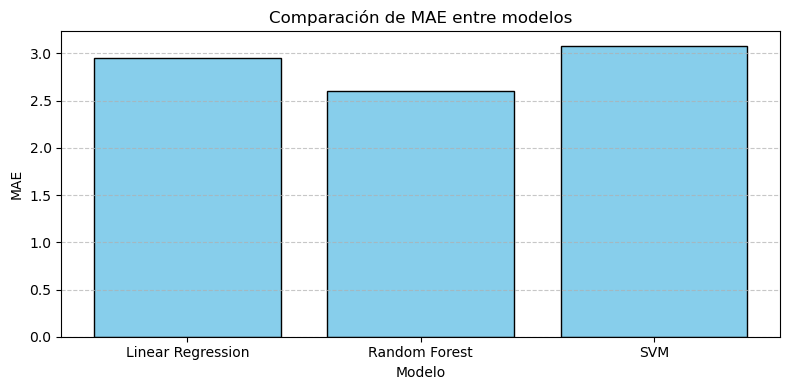

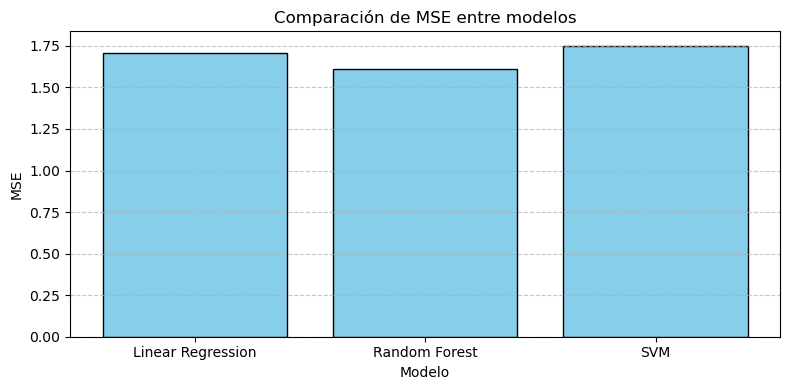

In [54]:
resultados_modelos = {
    'Linear Regression': {'MAE': 2.95, 'MSE': 1.71},
    'Random Forest': {'MAE': 2.60, 'MSE': 1.61},
    'SVM': {'MAE': 3.08, 'MSE': 1.75}
}

# Crear gráficos comparativos
metricas = ['MAE', 'MSE']
for metrica in metricas:
    valores = [resultados_modelos[modelo][metrica] for modelo in resultados_modelos]
    plt.figure(figsize=(8, 4))
    plt.bar(resultados_modelos.keys(), valores, color='skyblue', edgecolor='black')
    plt.title(f'Comparación de {metrica} entre modelos')
    plt.ylabel(metrica)
    plt.xlabel('Modelo')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
